In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#MULTI-CLASS CLASSIFICATION

In [2]:
train = pd.read_csv("E:/LEI 5/TCC/Monografia/dataset/UNSW-NB15/Project TCC/multi_data")
test = pd.read_csv("E:/LEI 5/TCC/Monografia/dataset/UNSW-NB15/UNSW_NB15_testing-set.csv")

In [44]:
#Data Splitting

X = multi_data.drop(columns=['label'],axis=1)
y = multi_data['label']

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training set
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after oversampling
print("Class distribution before oversampling:")
print(pd.Series(y_train).value_counts())

print("Class distribution after oversampling:")
print(pd.Series(y_train_oversampled).value_counts())


Class distribution before oversampling:
5    31668
6    15623
3    12878
2     1424
4     1376
7     1364
0      438
8       85
1       82
Name: label, dtype: int64
Class distribution after oversampling:
5    31668
3    31668
6    31668
7    31668
2    31668
0    31668
4    31668
8    31668
1    31668
Name: label, dtype: int64


In [46]:
X_train_oversampled.shape , y_train_oversampled.shape

((285012, 15), (285012,))

In [47]:
print("---------------------------------(K Nearest Neighbor Classifier n=5)---------------------------------")

---------------------------------(K Nearest Neighbor Classifier n=5)---------------------------------


In [48]:
from time import time

t0 = time()

knn_multi_5 = KNeighborsClassifier(n_neighbors=5)
#knn_multi_5 = KNeighborsClassifier()

knn_multi_5.fit(X_train_oversampled, y_train_oversampled)

tt = time() - t0


print ("Classifier trained in {} seconds.".format(round(tt, 3)))

Classifier trained in 2.192 seconds.


In [49]:
knn_multi_5.score(X_train_oversampled, y_train_oversampled)

0.9365219710047297

In [51]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

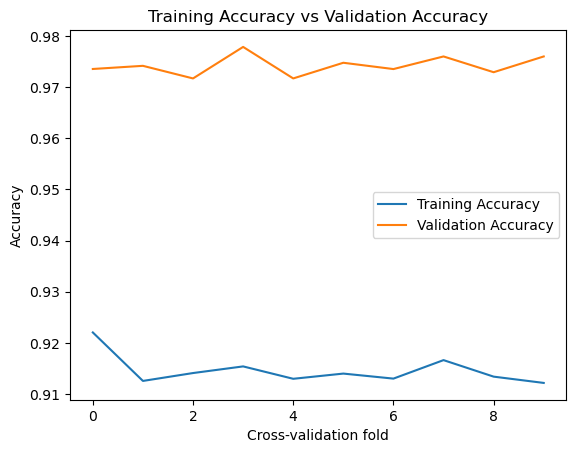

In [53]:
cv_scores_train = cross_val_score(knn_multi_5, X_train_oversampled, y_train_oversampled, cv=10, scoring='accuracy')
cv_scores_val = cross_val_score(knn_multi_5, X_test, y_test, cv=10, scoring='accuracy')

# Calculate the training and validation accuracies
train_accuracy = np.mean(cv_scores_train)
val_accuracy = np.mean(cv_scores_val)

# Plot the training and validation accuracies
plt.plot(range(len(cv_scores_train)), cv_scores_train, label='Training Accuracy')
plt.plot(range(len(cv_scores_val)), cv_scores_val, label='Validation Accuracy')
plt.xlabel('Cross-validation fold')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

In [55]:
print(np.mean(cv_scores_train))

print(np.mean(cv_scores_val))

0.9146351545275685
0.9741916917828384


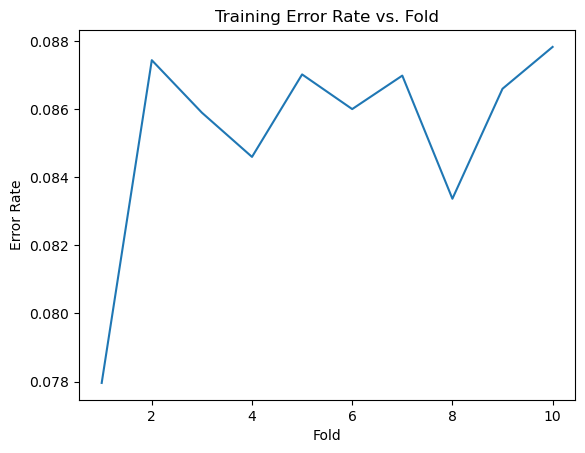

In [51]:
cv_scores = cross_val_score(estimator=knn_multi_5, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='accuracy') 

# plot the training loss for each fold
plt.plot(range(1, 11), 1 - cv_scores)
plt.xlabel('Fold')
plt.ylabel('Error Rate')
plt.title('Training Error Rate vs. Fold')
plt.show()

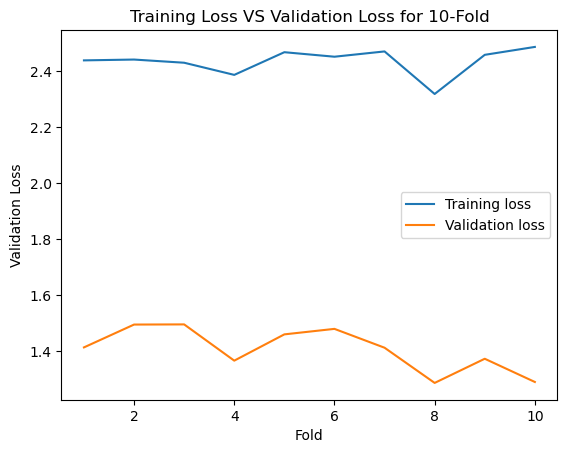

In [58]:
loss_Train_scores = cross_val_score(estimator=knn_multi_5, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='neg_log_loss')
loss_Val_scores = cross_val_score(estimator=knn_multi_5, X=X_test, y=y_test, cv=10, scoring='neg_log_loss')


# plot the validation loss for each fold
plt.plot(range(1, 11), 1 - loss_Train_scores, label='Training loss')
plt.plot(range(1, 11), 1 - loss_Val_scores, label='Validation loss')
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.title('Training Loss VS Validation Loss for 10-Fold')
plt.legend()
plt.show()

In [50]:
acc = knn_multi_5.score(X_test,y_test)

#print("Accuracy: %0.5f for the %s" % (acc))
print ("Accuracy is {}".format(round(acc,4)))

Accuracy is 0.9672


In [51]:
y_pred_5 = knn_multi_5.predict(X_test)

In [52]:
from sklearn import metrics 

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred_5))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred_5))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred_5)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred_5))
print("Accuracy - ",accuracy_score(y_test,y_pred_5))
print("Precision:", metrics.precision_score(y_test, y_pred_5, average = "micro"))
print("Recall:", metrics.recall_score(y_test, y_pred_5, average = "micro"))
print("F1 Score:", metrics.f1_score(y_test, y_pred_5, average = "micro"))

Mean Absolute Error -  0.09547274407145057
Mean Squared Error -  0.3607021866338158
Root Mean Squared Error -  0.6005848704669606
R2 Score -  0.7634420614234565
Accuracy -  0.9671696951031722
Precision: 0.9671696951031722
Recall: 0.9671696951031722
F1 Score: 0.9671696951031722


In [53]:
print(classification_report(y_test, y_pred_5,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       126
      Backdoor       0.03      0.24      0.06        17
           DoS       1.00      1.00      1.00       367
      Exploits       1.00      1.00      1.00      3309
       Fuzzers       0.53      0.36      0.43       355
       Generic       0.99      0.99      0.99      7828
        Normal       1.00      1.00      1.00      3865
Reconnaissance       0.54      0.42      0.47       339
         Worms       0.04      0.14      0.06        29

      accuracy                           0.97     16235
     macro avg       0.68      0.68      0.67     16235
  weighted avg       0.97      0.97      0.97     16235



In [54]:
cm_5 = confusion_matrix(y_test, y_pred_5)

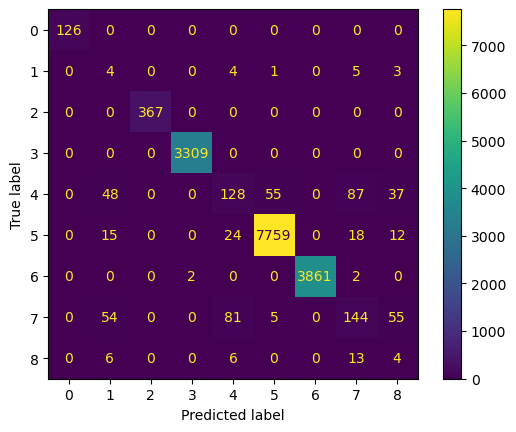

<Figure size 640x480 with 0 Axes>

In [55]:
disp =  ConfusionMatrixDisplay(cm_5)
disp.plot()
fig = plt.figure()
plt.rcParams["figure.figsize"] = (8, 8)
plt.show()

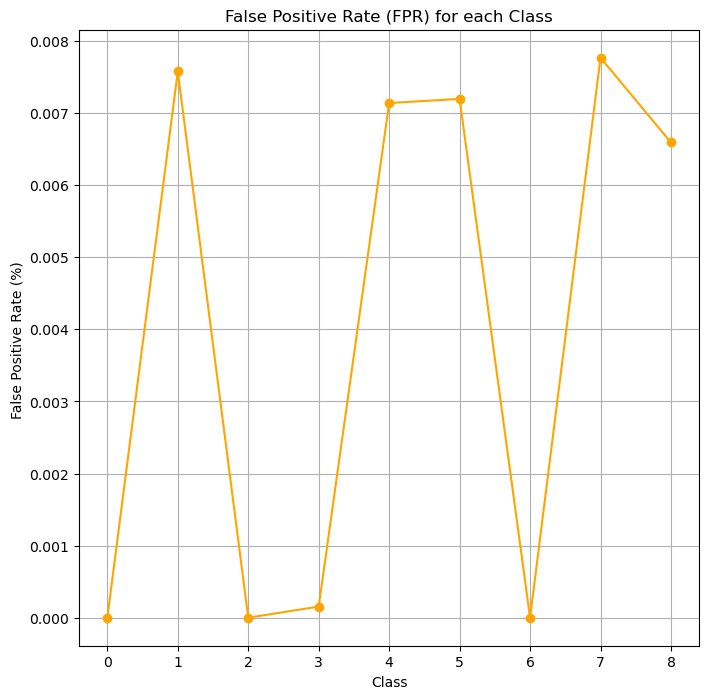

In [67]:
false_negatives = np.diag(cm_5) - np.sum(cm_5, axis=1)

# Calculate the rate of false negatives for each class
false_neg_rate = false_negatives / np.sum(cm_5, axis=1)

# Calculate the False Positive Rate (FPR) for each class
FP = cm_5.sum(axis=0) - np.diag(cm_5)
TN = cm_5.sum() - (FP + np.diag(cm_5))
FPR = FP / (FP + TN)

# Plot the FPR for each class
classes = np.unique(y)
plt.plot(classes, FPR, marker='o', linestyle='-',  color='orange')
plt.xlabel('Class')
plt.ylabel('False Positive Rate (%) ')
plt.title('False Positive Rate (FPR) for each Class')
plt.xticks(classes)
plt.grid(True)
plt.show()

In [56]:
from sklearn.model_selection import cross_val_score

acc_k5 = cross_val_score(estimator=knn_multi_5, X=X_train_oversampled, y=y_train_oversampled, cv=10)
print("scores for each fold")
for val in acc_k5:
    print(val)

scores for each fold
0.9220405585572943
0.9125675391200617
0.9141082769025648
0.9154064769657205
0.9129855092803761
0.9140030174379846
0.9130205957685695
0.9166345040524894
0.9134065471386968
0.912178520051928


In [57]:
print(np.mean(acc_k5))
print()
print(np.std(acc_k5))

0.9146351545275685

0.002779518572805972


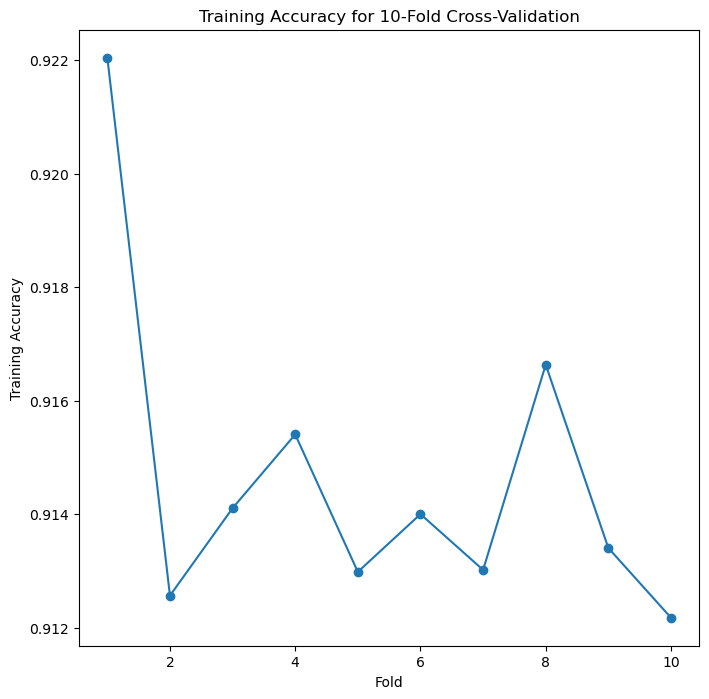

In [65]:
from sklearn.model_selection import cross_val_score

#train_acc_scores = cross_val_score(estimator=RFC, X=X_train, y=y_train, cv=10, scoring='accuracy')

# plot the training accuracy for each fold
plt.plot(np.arange(1,11), acc_k5, marker='o')
plt.xlabel('Fold')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy for 10-Fold Cross-Validation')
plt.show()

In [58]:
pre_k5 = cross_val_score(estimator=knn_multi_5, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='precision_micro')
print("precision for each fold")
for val_p in pre_k5:
    print(val_p)

precision for each fold
0.9220405585572943
0.9125675391200617
0.9141082769025648
0.9154064769657205
0.9129855092803761
0.9140030174379846
0.9130205957685695
0.9166345040524894
0.9134065471386968
0.912178520051928


In [59]:
print(np.mean(pre_k5))
print()
print(np.std(pre_k5))

0.9146351545275685

0.002779518572805972


In [61]:
rec_k5 = cross_val_score(estimator=knn_multi_5, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='recall_micro')
print("Recall for each fold")
for val_c in rec_k5:
    print(val_c)

Recall for each fold
0.9220405585572943
0.9125675391200617
0.9141082769025648
0.9154064769657205
0.9129855092803761
0.9140030174379846
0.9130205957685695
0.9166345040524894
0.9134065471386968
0.912178520051928


In [62]:
print(np.mean(rec_k5))
print()
print(np.std(rec_k5))

0.9146351545275685

0.002779518572805972


In [63]:
f1_k5 = cross_val_score(estimator=knn_multi_5, X=X_train_oversampled, y=y_train_oversampled, cv=10, scoring='f1_micro')
print("F1_Score for each fold")
for val_f in f1_k5:
    print(val_f)

F1_Score for each fold
0.9220405585572943
0.9125675391200617
0.9141082769025648
0.9154064769657205
0.9129855092803761
0.9140030174379846
0.9130205957685696
0.9166345040524894
0.9134065471386968
0.912178520051928


In [64]:
print(np.mean(f1_k5))
print()

print(np.std(f1_k5))

0.9146351545275685

0.0027795185728059653
